Task 1 - Web Scraping


In [10]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
from time import sleep

os.makedirs("data/raw", exist_ok=True)

base = "http://quotes.toscrape.com"

page = "/page/1/"
rows = []

while page:
    url = base + page
    print("Fetching", url)
    r = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(r.text, "lxml")
    quotes = soup.select(".quote")
    for q in quotes:
        text = q.find("span", class_="text").get_text(strip=True)
        author = q.find("small", class_="author").get_text(strip=True)
        tags = [t.get_text(strip=True) for t in q.select(".tags a.tag")]
        rows.append({"text": text, "author": author, "tags": ",".join(tags)})
    next_btn = soup.select_one("li.next > a")
    page = next_btn['href'] if next_btn else None
    sleep(1)  # polite delay

df_quotes = pd.DataFrame(rows)
out_path = "data/raw/quotes.csv"
df_quotes.to_csv(out_path, index=False)
print("Saved", len(df_quotes), "quotes to", out_path)


Fetching http://quotes.toscrape.com/page/1/
Fetching http://quotes.toscrape.com/page/2/
Fetching http://quotes.toscrape.com/page/3/
Fetching http://quotes.toscrape.com/page/4/
Fetching http://quotes.toscrape.com/page/5/
Fetching http://quotes.toscrape.com/page/6/
Fetching http://quotes.toscrape.com/page/7/
Fetching http://quotes.toscrape.com/page/8/
Fetching http://quotes.toscrape.com/page/9/
Fetching http://quotes.toscrape.com/page/10/
Saved 100 quotes to data/raw/quotes.csv


Task 2 -  Exploratory Data Analysis (EDA)


In [1]:
pip install pandas numpy matplotlib seaborn scipy jupyterlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.6 MB/s eta 0:00:00


In [6]:

import pandas as pd
import csv
import os

csv_path = "/content/Reviews.csv"   # if you uploaded using left Files pane, leave as is
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"{csv_path} not found. Upload Reviews.csv via Colab Files (left panel) or change csv_path.")

# Try reading with robust options. on_bad_lines='skip' will skip malformed rows.
try:
    df = pd.read_csv(
        csv_path,
        engine='python',          # python engine is more tolerant sometimes
        on_bad_lines='skip',      # skip problematic rows
        quoting=csv.QUOTE_MINIMAL,
        quotechar='"',
        escapechar='\\',
        encoding='utf-8'
    )
except Exception as e:
    print("First attempt failed:", e)
    # fallback to ISO-8859-1
    df = pd.read_csv(csv_path, engine='python', on_bad_lines='skip', encoding='ISO-8859-1')

print("Loaded dataframe shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(3)


Loaded dataframe shape: (6263, 10)
Columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:

import numpy as np

# Use df from previous cell
print("Shape:", df.shape)
print("\nMissing values (top columns):\n", df.isna().sum().sort_values(ascending=False).head(20))

# If dataset is Amazon fine-food-like, check for typical columns. Rename if necessary.
# Example columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
# 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

# If standard columns not present but similar, try to detect
expected = ['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary','Text']
if set(expected).issubset(set(df.columns)):
    print("Looks like Amazon Fine Food Reviews format.")
else:
    print("Column set does not match exactly—use df.columns to inspect and adapt.")

# Basic stats
print("\nDescribe (numeric):")
display(df.describe(include=[np.number]).T)

print("\nTop 10 values for 'Score' if present:")
if 'Score' in df.columns:
    print(df['Score'].value_counts().sort_index())

# Create a smaller sample for fast work (first 5000 non-null text rows)
if 'Text' in df.columns:
    df_sample = df[df['Text'].notna()].head(5000).copy()
else:
    df_sample = df.head(5000).copy()

print("\nSample shape:", df_sample.shape)
# Save sample
os.makedirs("data/clean", exist_ok=True)
sample_path = "data/clean/Reviews_sample_5k.csv"
df_sample.to_csv(sample_path, index=False)
print("Saved sample to", sample_path)


Shape: (6263, 10)

Missing values (top columns):
 Text                      1
Id                        0
ProductId                 0
UserId                    0
HelpfulnessNumerator      0
ProfileName               0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
dtype: int64
Looks like Amazon Fine Food Reviews format.

Describe (numeric):


,count,mean,std,min,25%,50%,75%,max
Id,6263.0,3.132000e+03,1.808117e+03,1.0,1.566500e+03,3.132000e+03,4.697500e+03,6.263000e+03
HelpfulnessNumerator,6263.0,1.591410e+00,5.411248e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,1.870000e+02
HelpfulnessDenominator,6263.0,2.065624e+00,6.075171e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,2.160000e+02
Score,6263.0,4.178030e+00,1.317674e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,6263.0,1.295220e+09,4.770384e+07,961718400.0,1.271549e+09,1.309651e+09,1.330560e+09,1.351210e+09



Top 10 values for 'Score' if present:
Score
1     576
2     348
3     478
4     844
5    4017
Name: count, dtype: int64

Sample shape: (5000, 10)
Saved sample to data/clean/Reviews_sample_5k.csv


Task 3 -  Data Visualization


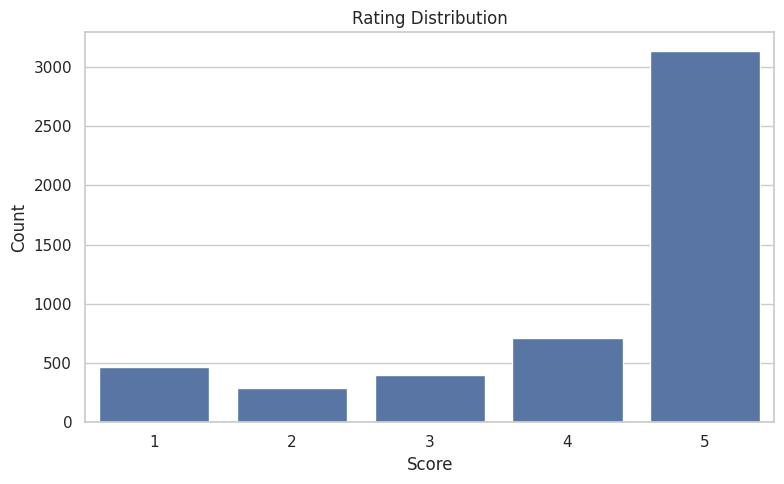

Saved reports/rating_distribution.png


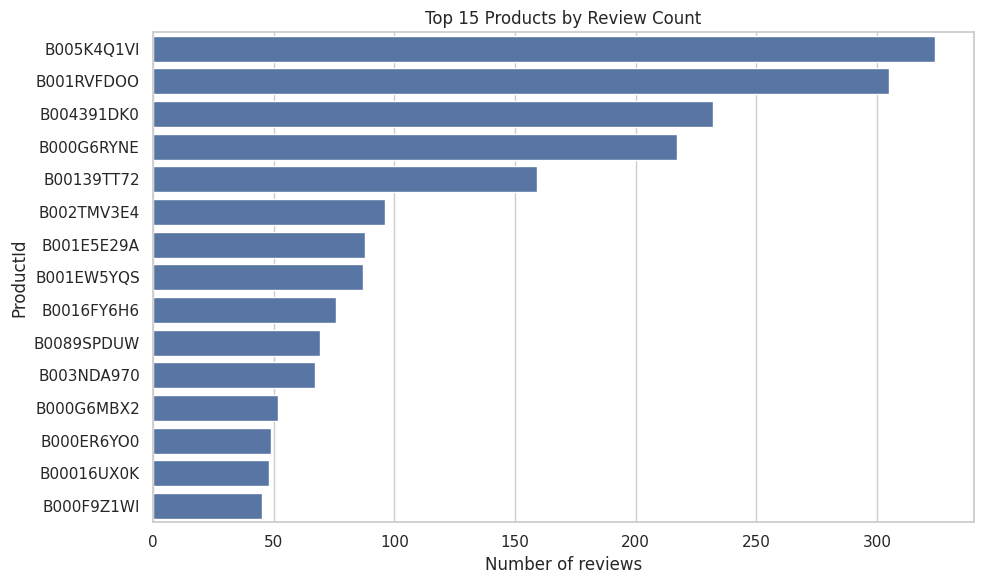

Saved reports/top_products.png


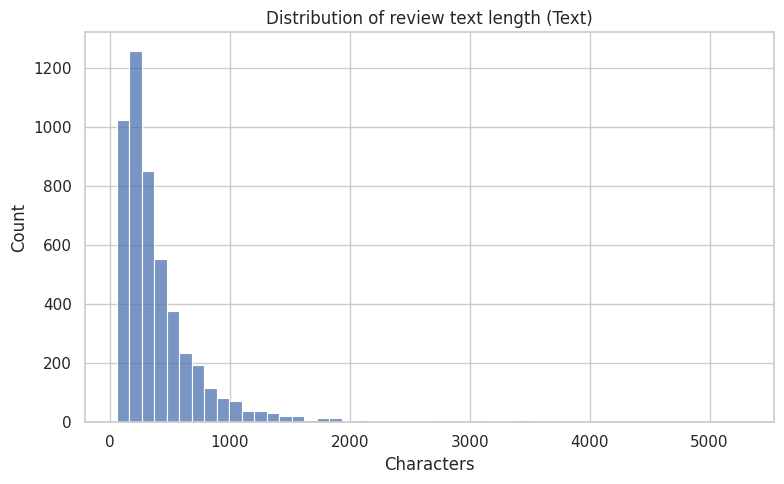

Saved reports/text_length_distribution.png


In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
os.makedirs("reports", exist_ok=True)

# Use df_sample from previous step if available, otherwise use df
data = locals().get('df_sample', df)

# 1) Score distribution
if 'Score' in data.columns:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x='Score', data=data, order=sorted(data['Score'].dropna().unique()))
    plt.title("Rating Distribution")
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.tight_layout()
    out1 = "reports/rating_distribution.png"
    plt.savefig(out1, dpi=150)
    plt.show()
    print("Saved", out1)

# 2) Top Products (by number of reviews) if ProductId exists
if 'ProductId' in data.columns:
    top_products = data['ProductId'].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.title("Top 15 Products by Review Count")
    plt.xlabel("Number of reviews")
    plt.tight_layout()
    out2 = "reports/top_products.png"
    plt.savefig(out2, dpi=150)
    plt.show()
    print("Saved", out2)

# 3) Word length distribution of reviews (text length)
text_col = None
for c in ['Text','ReviewText','Review','Summary']:
    if c in data.columns:
        text_col = c
        break

if text_col:
    data['text_len'] = data[text_col].astype(str).apply(len)
    plt.figure(figsize=(8,5))
    sns.histplot(data['text_len'], bins=50, kde=False)
    plt.title(f"Distribution of review text length ({text_col})")
    plt.xlabel("Characters")
    plt.tight_layout()
    out3 = "reports/text_length_distribution.png"
    plt.savefig(out3, dpi=150)
    plt.show()
    print("Saved", out3)
else:
    print("No text column found for text-length plot. Columns:", data.columns.tolist())
